### Import the standard libraries

In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [83]:
# read data
data_challenge_train = pd.read_csv('challenge_train.csv')
data_challenge_train.head()

,Mileage,Age,Brand,Horsepower,Price,Accidents_History,Last_Service_Date,ID
0,4307.854178,4.843951,BMW,246.315008,17072.488092,1,2020-10-31,1350
1,52160.653567,1.452421,ford,182.782369,17351.677402,1,2022-12-27,2684
2,42237.214362,5.673198,BMW,22.188980,9203.644481,3,NaN,3201
3,58520.110388,2.806898,NaN,155.824358,11785.969236,0,2022-08-26,1332
4,60376.767928,3.599798,Ford,155.421041,14663.608320,3,2021-12-22,2724


In [3]:
data_challenge_test = pd.read_csv('challenge_test.csv')
data_challenge_test.head()

,Mileage,Age,Brand,Horsepower,Accidents_History,Last_Service_Date,ID
0,55764.851078,8.818906,BMW,166.554774,1,2021-08-01,1622
1,53043.215667,6.230922,BMW,108.419204,1,2023-03-12,101
2,50782.476189,8.937179,Ford,171.856198,0,2022-01-20,3951
3,60632.893631,7.080065,Ford,136.408591,0,2021-12-18,397
4,11881.417885,0.698784,Toyota,147.636385,1,2021-02-22,4945


### Preprocessing 
- In the data preprocessing, we first examined the shape of the data to understand its dimensions 
- Next, we checked for null values in the dataset and removed them if any were found 
- Additionally, we performed a check for duplicate values and replaced them to ensure data integrity 
- To gain insights into the relationships between variables, we visualized the correlation map using a heatmap. This visualization allowed us to identify patterns and dependencies among the feature in the dataset, helping us understand the interplay between various attribute 


In [4]:
# check shape of the data
data_challenge_train.columns

Index(['Mileage', 'Age', 'Brand', 'Horsepower', 'Price', 'Accidents_History',
       'Last_Service_Date', 'ID'],
      dtype='object')

In [5]:
sh = data_challenge_train.shape
print(f'The shape of the data: {sh[0]} rows and {sh[1]} columns')

The shape of the data: 2000 rows and 8 columns


In [6]:
# The basic information of data
data_challenge_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mileage            2000 non-null   float64
 1   Age                1933 non-null   float64
 2   Brand              1921 non-null   object 
 3   Horsepower         2000 non-null   float64
 4   Price              2000 non-null   float64
 5   Accidents_History  2000 non-null   int64  
 6   Last_Service_Date  1925 non-null   object 
 7   ID                 2000 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 125.1+ KB


In [7]:
# Basic Statistic of data set
data_challenge_train.describe().style.background_gradient('bone_r')

,Mileage,Age,Horsepower,Price,Accidents_History,ID
count,2000.000000,1933.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,47371.271244,4.901168,140.571945,16286.915618,0.511000,4970.844000
std,21094.525714,2.890400,67.811117,11201.085165,0.706490,2915.969163
min,-74007.968084,0.007267,-257.937259,-4234.207009,0.000000,4.000000
25%,38666.978977,2.348844,109.931002,11464.115851,0.000000,2461.750000
50%,49345.990091,4.843951,144.027053,15396.886224,0.000000,4816.500000
75%,59000.476654,7.439484,180.082763,18697.747795,1.000000,7543.750000
max,107024.903225,9.999566,295.591933,91450.965098,4.000000,9997.000000


In [8]:
# checking the null values of the data set
sum_na = data_challenge_train.isna().sum()/len(data_challenge_train)*100
print('% missing value in each column')
print(sum_na)

% missing value in each column
Mileage              0.00
Age                  3.35
Brand                3.95
Horsepower           0.00
Price                0.00
Accidents_History    0.00
Last_Service_Date    3.75
ID                   0.00
dtype: float64


In [76]:
# drop missing values 
from sklearn.impute import KNNImputer

data_challenge_train['Brand'] = data_challenge_train['Brand'].fillna('Unknown', inplace=True)
data_challenge_train['Last_Service_Date'] = data_challenge_train['Last_Service_Date'].fillna('Unknown', inplace=True)
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(data_challenge_train)
#data_challenge_train1 = data_challenge_train.dropna()
#data_challenge_train1.isna().sum()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [10]:
# Checking the duplicate values in the data
sum_duplicate = data_challenge_train.duplicated().sum()
print(f'The dataset contains {sum_duplicate} duplicate values')

The dataset contains 0 duplicate values


In [11]:
# The shape of data after drop missing value 
print(f'The dataset contains {data_challenge_train.shape[0]} rows and {data_challenge_train.shape[1]} columns')

The dataset contains 2000 rows and 8 columns


### About the DataSet 
- Data Size: The dataset contains 1785 rows and 8 columns 
- Data Types: The data contains features with data types int64, Object
- Missing values: 3 columns has missing values in the dataset, we droped missing value
  Duplicate values: No duplicate values 
- Irrelevant Features: All the features seems important and useful for final evaluation


In [12]:
data_challenge_train.head()

,Mileage,Age,Brand,Horsepower,Price,Accidents_History,Last_Service_Date,ID
0,4307.854178,4.843951,BMW,246.315008,17072.488092,1,2020-10-31,1350
1,52160.653567,1.452421,ford,182.782369,17351.677402,1,2022-12-27,2684
2,42237.214362,5.673198,BMW,22.188980,9203.644481,3,NaN,3201
3,58520.110388,2.806898,NaN,155.824358,11785.969236,0,2022-08-26,1332
4,60376.767928,3.599798,Ford,155.421041,14663.608320,3,2021-12-22,2724


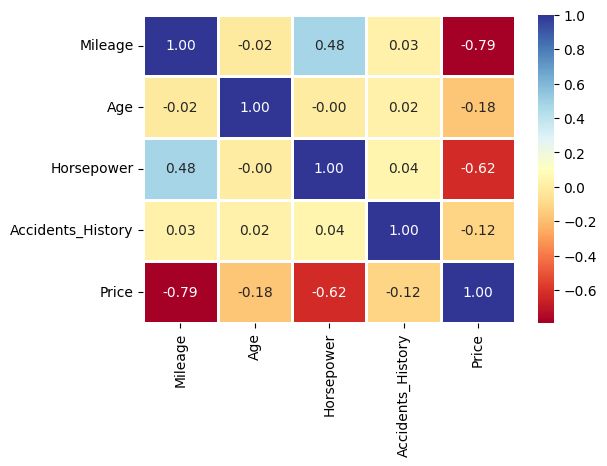

In [13]:
# Visulaization the correlation heat map 
plt.figure(figsize=(6, 4))
sns.heatmap(data_challenge_train1[['Mileage', 'Age', 'Horsepower', 'Accidents_History', 'Price']].corr(), 
            annot = True, 
            cmap = 'RdYlBu', 
            fmt = '.2f', 
            annot_kws = None, 
            linewidths = 1,)
plt.show()

### Explore Data Analysis

In [14]:
data_challenge_train1.head()

,Mileage,Age,Brand,Horsepower,Price,Accidents_History,Last_Service_Date,ID
0,4307.854178,4.843951,BMW,246.315008,17072.488092,1,2020-10-31,1350
1,52160.653567,1.452421,ford,182.782369,17351.677402,1,2022-12-27,2684
4,60376.767928,3.599798,Ford,155.421041,14663.608320,3,2021-12-22,2724
5,52299.327037,3.756751,Toyota,75.966754,16920.826431,0,2021-08-26,6744
6,56745.681503,7.550940,BMW,178.787873,5678.861498,1,2021-05-19,9743


<Figure size 1000x800 with 0 Axes>

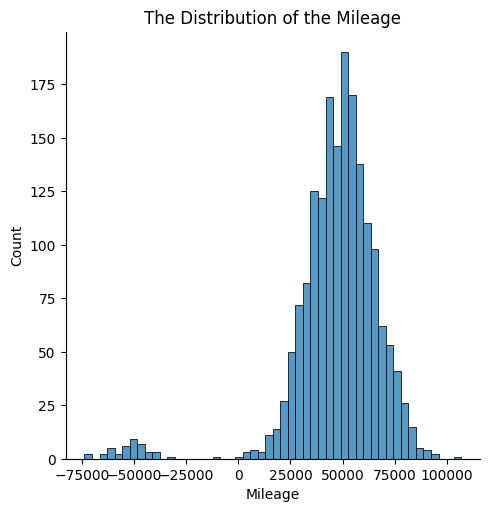

In [15]:
# Distribution of Mileage 
plt.figure(figsize=(10, 8))
sns.displot(data_challenge_train1['Mileage'], bins=50)
plt.title('The Distribution of the Mileage')
plt.show()

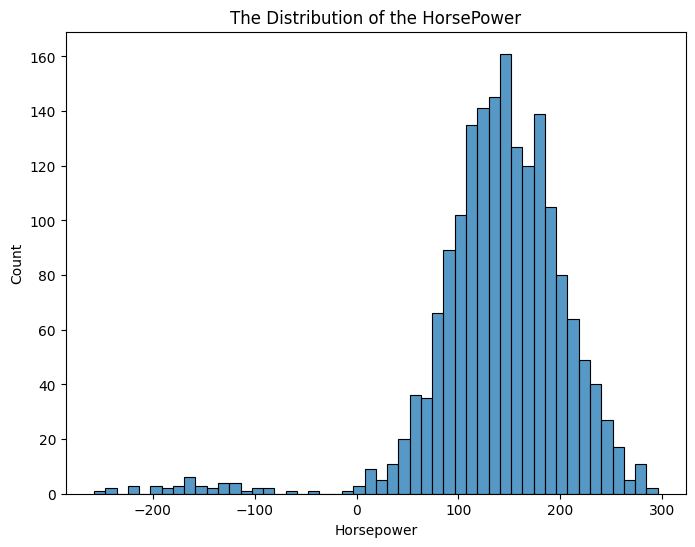

In [16]:
# The distribution of the Horsepower 
plt.figure(figsize=(8, 6))
sns.histplot(data_challenge_train1['Horsepower'], bins=50)
plt.title('The Distribution of the HorsePower')
plt.show()

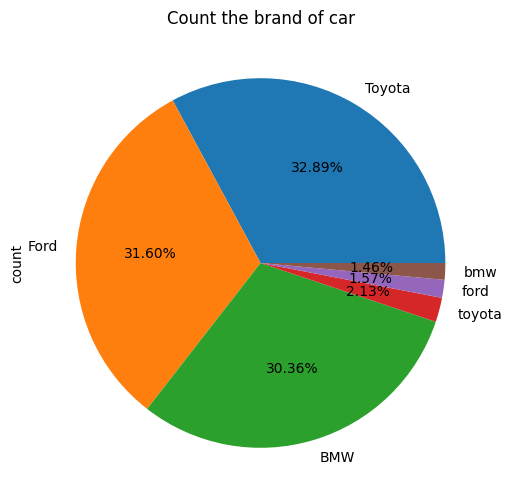

In [17]:
# Count the brand 
plt.figure(figsize=(8, 6))
data_challenge_train1['Brand'].value_counts().plot(kind='pie', 
                                                  autopct = '%1.2f%%')
plt.title('Count the brand of car')
plt.show()

Text(0.5, 1.0, 'Count of Accidents history')

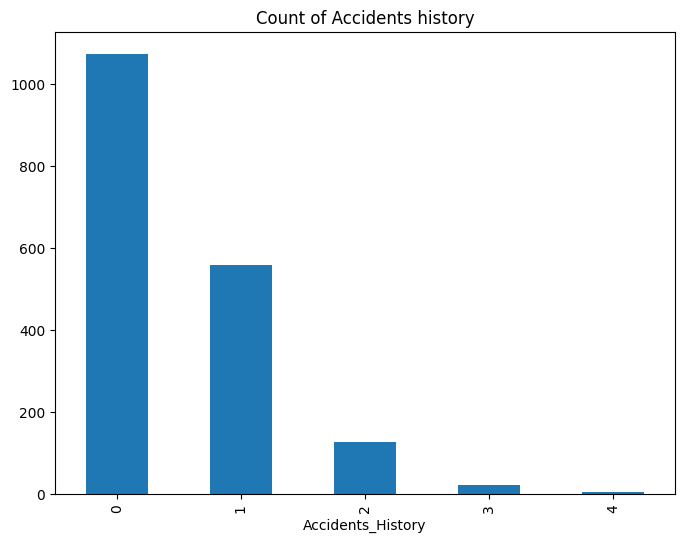

In [18]:
# Accidents history 
plt.figure(figsize=(8, 6))
data_challenge_train1['Accidents_History'].value_counts().plot(kind='bar')
plt.title('Count of Accidents history')

<Axes: xlabel='variable', ylabel='value'>

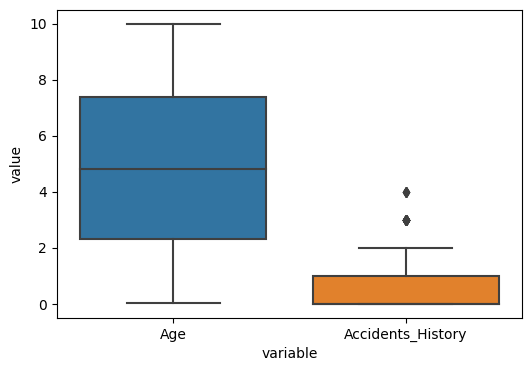

In [19]:
# checking anomaly values
plt.figure(figsize=(6, 4))
sns.boxplot(x="variable", y="value", data=pd.melt(data_challenge_train1[['Age','Accidents_History']]))

<Axes: xlabel='variable', ylabel='value'>

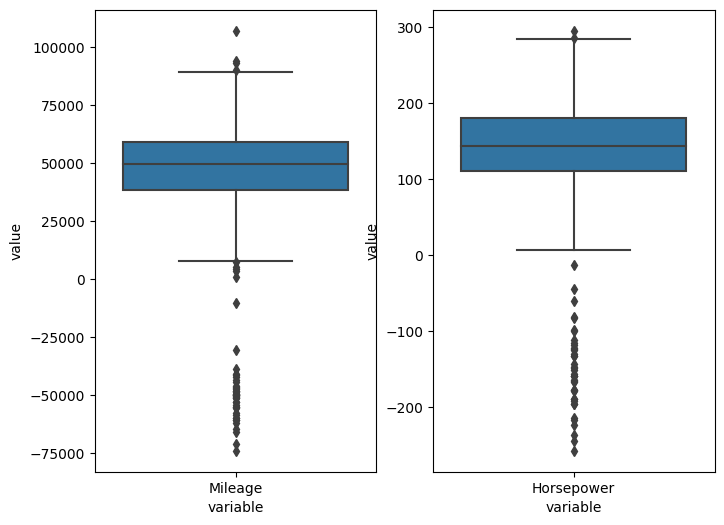

In [20]:
plt.figure(figsize=(8, 6))
plt.subplot(121)
sns.boxplot(x="variable", y="value", data=pd.melt(data_challenge_train1[['Mileage']]))
plt.subplot(122)
sns.boxplot(x="variable", y="value", data=pd.melt(data_challenge_train1[['Horsepower']]))

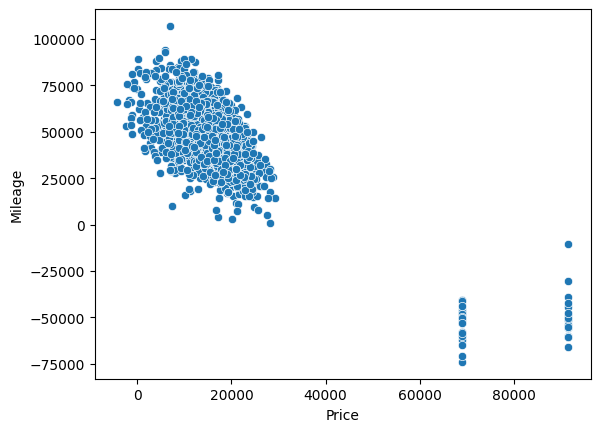

In [21]:
## Relationship between Mileage and Price 
sns.scatterplot(data=data_challenge_train1, x='Price', y='Mileage')
plt.show()

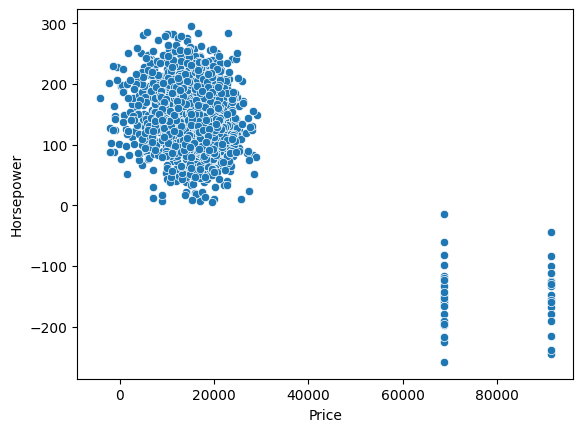

In [22]:
sns.scatterplot(data=data_challenge_train1, x='Price', y='Horsepower')
plt.show()

In [29]:
# Drop anomaly value 
# Compute IQR for 'mileage' columns
Q1 = data_challenge_train1['Mileage'].quantile(0.25)
Q3 = data_challenge_train1['Mileage'].quantile(0.75)
IQR = Q3 - Q1

# Xác định các điểm bất thường
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data_challenge_train1[(data_challenge_train1['Mileage'] < lower_bound) | (data_challenge_train1['Mileage'] > upper_bound)]

# In ra các điểm bất thường
print("Các điểm bất thường:")
print(outliers)
print(len(outliers))

Các điểm bất thường:
            Mileage       Age   Brand  Horsepower         Price  \
0       4307.854178  4.843951     BMW  246.315008  17072.488092   
37    -49831.578333  9.725981     BMW  -61.026444  68853.503157   
92    -38923.009097  2.212056    Ford -100.487866  91450.965098   
94    -57857.642804  3.683433    Ford -191.762807  68853.503157   
272   -48487.798600  2.135476    Ford -159.152098  68853.503157   
355   -30605.924378  9.647228    Ford -244.797624  91450.965098   
360   -61949.580135  7.210926  Toyota -115.704693  68853.503157   
417     3247.151126  4.416035  Toyota  226.841211  20102.872257   
420   -40871.813906  0.958620    Ford  -82.115845  68853.503157   
428   -51001.940544  4.354392    Ford -178.429776  91450.965098   
467    93936.443626  6.124562    Ford  247.123506   5975.283322   
522   -59972.750589  7.785880     BMW -178.507057  68853.503157   
546   -55742.098832  8.532278  Toyota -124.263591  91450.965098   
627   -46475.229756  0.303109     BMW -16

### Machine Learning Modeling 

In [57]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statistics import mean

In [85]:
# drop missing values 
from sklearn.impute import KNNImputer

df = data_challenge_train.copy()
df['Brand'].fillna('Unknown', inplace=True)
df['Last_Service_Date'].fillna('Unknown', inplace=True)
df['Age'].fillna(df["Age"].mean(), inplace=True)

#imputer = KNNImputer(n_neighbors=5)
#X_imputed = imputer.fit_transform(data_challenge_train)

df.head()

,Mileage,Age,Brand,Horsepower,Price,Accidents_History,Last_Service_Date,ID
0,4307.854178,4.843951,BMW,246.315008,17072.488092,1,2020-10-31,1350
1,52160.653567,1.452421,ford,182.782369,17351.677402,1,2022-12-27,2684
2,42237.214362,5.673198,BMW,22.188980,9203.644481,3,Unknown,3201
3,58520.110388,2.806898,Unknown,155.824358,11785.969236,0,2022-08-26,1332
4,60376.767928,3.599798,Ford,155.421041,14663.608320,3,2021-12-22,2724


In [86]:
# Convert object values to numeric values using LaberEncoder
for col in df.select_dtypes(include='object').columns:
    label_encoder = LabelEncoder()
    label_encoder.fit(df[col].unique())
    df[col] = label_encoder.transform(df[col])

In [87]:
df.head()

,Mileage,Age,Brand,Horsepower,Price,Accidents_History,Last_Service_Date,ID
0,4307.854178,4.843951,0,246.315008,17072.488092,1,26,1350
1,52160.653567,1.452421,5,182.782369,17351.677402,1,676,2684
2,42237.214362,5.673198,0,22.188980,9203.644481,3,897,3201
3,58520.110388,2.806898,3,155.824358,11785.969236,0,577,1332
4,60376.767928,3.599798,1,155.421041,14663.608320,3,375,2724


In [88]:
# Normalization values 
X = df[["Mileage", "Age", "Brand", "Horsepower", "Accidents_History", "Last_Service_Date"]]
y = df[["Price"]]
X.head()

,Mileage,Age,Brand,Horsepower,Accidents_History,Last_Service_Date
0,4307.854178,4.843951,0,246.315008,1,26
1,52160.653567,1.452421,5,182.782369,1,676
2,42237.214362,5.673198,0,22.188980,3,897
3,58520.110388,2.806898,3,155.824358,0,577
4,60376.767928,3.599798,1,155.421041,3,375


In [90]:
# Scalling the data 
standard = StandardScaler()
X = standard.fit_transform(X)
y = y.values

In [142]:
X

array([[-2.04196044, -0.02014075, -1.05878458,  1.55976649,  0.69232697,
        -1.61239789],
       [ 0.22710063, -1.21398906,  2.98701052,  0.62262623,  0.69232697,
         0.79965764],
       [-0.24344424,  0.27176129, -1.05878458, -1.74621178,  3.5239301 ,
         1.61975651],
       ...,
       [ 0.32807787,  0.1888828 ,  0.55953346, -1.8761442 ,  0.69232697,
        -0.28391192],
       [ 0.02332993,  1.51923458,  0.55953346,  0.28380066, -0.7234746 ,
        -0.77003388],
       [ 0.08936158, -0.11875293, -1.05878458,  1.39511626,  3.5239301 ,
         0.15025807]])

In [127]:
# Split data to train dataset and test dataset 
X_train,X_test, y_train, y_test_1 = train_test_split(X, y, test_size=0.33, random_state=42)
print('Shape of x_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of x_test: ', X_test.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (1340, 6)
Shape of y_train:  (1340, 1)
Shape of x_test:  (660, 6)
Shape of y_test:  (660, 1)


In [121]:
# test model with Linear Regression 
linear = LinearRegression()
linear.fit(X_train, y_train)
linear_pred_y = linear.predict(X_test)
print('R2_score: ', r2_score(y_test, linear_pred_y))
print("Mean absolute error: ", mean_absolute_error(y_test, linear_pred_y))
print("Mean squared error: ", mean_squared_error(y_test, linear_pred_y))



R2_score:  0.7716885341325064
Mean absolute error:  3698.5438873329003
Mean squared error:  26634165.910521686


In [93]:
# List to maintain the different cross-validation scores
cross_val_scores_ridge = []
 
# List to maintain the different values of alpha
alpha = []
 
# Loop to compute the different values of cross-validation scores
for i in range(1, 9):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(X_train, y_train)
    scores = cross_val_score(ridgeModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)
 
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

0.25 : 76.4024841191995
0.5 : 76.40302364404494
0.75 : 76.40356098155372
1.0 : 76.40409613356003
1.25 : 76.404629101896
1.5 : 76.40515988839185
1.75 : 76.4056884948758
2.0 : 76.40621492317413


In [94]:
model1 = Ridge(alpha=2.0)
model1.fit(X_train, y_train)
ridge_pred_y = model1.predict(X_test)
print('R2_score: ', r2_score(y_test, ridge_pred_y))
print("Mean absolute error: ", mean_absolute_error(y_test, ridge_pred_y))
print("Mean squared error: ", mean_squared_error(y_test, ridge_pred_y))

R2_score:  0.771723653318959
Mean absolute error:  3696.386262204443
Mean squared error:  26630069.00616751


In [95]:
### Decision Tree
for i in range(5, 20):
    tree_model = DecisionTreeRegressor(max_depth=i)
    tree_model.fit(X_train, y_train)
    tree_pred_y = tree_model.predict(X_test)
    print(f'Max depth: {i}')
    print('R2_score: ', r2_score(y_test, tree_pred_y))
    print("Mean absolute error: ", mean_absolute_error(y_test, tree_pred_y))
    print("Mean squared error: ", mean_squared_error(y_test, tree_pred_y))

Max depth: 5
R2_score:  0.7909017805483779
Mean absolute error:  3131.5426648073526
Mean squared error:  24392803.258078054
Max depth: 6
R2_score:  0.8520830451390977
Mean absolute error:  2851.9233556091835
Mean squared error:  17255571.032209538
Max depth: 7
R2_score:  0.8523257718463059
Mean absolute error:  2756.7871022622016
Mean squared error:  17227255.225265134
Max depth: 8
R2_score:  0.8075690002591853
Mean absolute error:  2775.376930295204
Mean squared error:  22448452.835912216
Max depth: 9
R2_score:  0.8568859450015881
Mean absolute error:  2691.5151995888446
Mean squared error:  16695278.40168771
Max depth: 10
R2_score:  0.844435096782351
Mean absolute error:  2810.9052967946554
Mean squared error:  18147758.924020957
Max depth: 11
R2_score:  0.7821805411374414
Mean absolute error:  3033.096382113507
Mean squared error:  25410198.2300462
Max depth: 12
R2_score:  0.7783804119028414
Mean absolute error:  3034.693191179435
Mean squared error:  25853510.492665995
Max depth: 1

In [97]:
model_tree = DecisionTreeRegressor(max_depth=9)
model_tree.fit(X_train, y_train)
tree_pred_y = model_tree.predict(X_test)
print('R2_score: ', r2_score(y_test, tree_pred_y))
print("Mean absolute error: ", mean_absolute_error(y_test, tree_pred_y))
print("Mean squared error: ", mean_squared_error(y_test, tree_pred_y))

R2_score:  0.848384155227248
Mean absolute error:  2749.5844330664413
Mean squared error:  17687073.003530316


In [98]:
### Data Test 
data_challenge_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mileage            2160 non-null   float64
 1   Age                2063 non-null   float64
 2   Brand              2079 non-null   object 
 3   Horsepower         2160 non-null   float64
 4   Accidents_History  2160 non-null   int64  
 5   Last_Service_Date  2070 non-null   object 
 6   ID                 2160 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 118.2+ KB


In [161]:
data_challenge_test.head()

,Mileage,Age,Brand,Horsepower,Accidents_History,Last_Service_Date,ID
0,55764.851078,8.818906,BMW,166.554774,1,2021-08-01,1622
1,53043.215667,6.230922,BMW,108.419204,1,2023-03-12,101
2,50782.476189,8.937179,Ford,171.856198,0,2022-01-20,3951
3,60632.893631,7.080065,Ford,136.408591,0,2021-12-18,397
4,11881.417885,0.698784,Toyota,147.636385,1,2021-02-22,4945


In [145]:

df1 = data_challenge_test.copy()
df1['Brand'].fillna('Unknown', inplace=True)
df1['Last_Service_Date'].fillna('Unknown', inplace=True)
df1['Age'].fillna(df1["Age"].mean(), inplace=True)

In [146]:
# Convert object values to numeric values using LaberEncoder
for col in df1.select_dtypes(include='object').columns:
    label_encoder = LabelEncoder()
    label_encoder.fit(df1[col].unique())
    df1[col] = label_encoder.transform(df1[col])

In [147]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mileage            2160 non-null   float64
 1   Age                2160 non-null   float64
 2   Brand              2160 non-null   int64  
 3   Horsepower         2160 non-null   float64
 4   Accidents_History  2160 non-null   int64  
 5   Last_Service_Date  2160 non-null   int64  
 6   ID                 2160 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 118.2 KB


In [155]:
df1 = df1.drop("ID", axis=1)

In [156]:
# Scalling the data 
standard = StandardScaler()
X_1 = standard.fit_transform(df1)
X_1

array([[ 0.39959728,  1.35074628, -1.04967561,  0.34575913,  0.74224866,
        -0.7784393 ],
       [ 0.258643  ,  0.43252587, -1.04967561, -0.5797832 ,  0.74224866,
         1.00265301],
       [ 0.14155864,  1.39270992, -0.26487142,  0.43015999, -0.70473429,
        -0.27662361],
       ...,
       [-0.04536352, -0.04717591, -0.26487142, -0.47817043, -0.70473429,
        -1.19897498],
       [ 0.45150466,  0.54514107, -1.04967561,  1.32842947, -0.70473429,
         1.07333127],
       [ 1.06428719, -0.5254955 , -1.04967561, -0.34178886, -0.70473429,
        -1.37920456]])

In [157]:
X_1.shape

(2160, 6)

In [158]:
y_test = tree_model.predict(X_1)
y_test

array([  897.00608624, 10945.34398343, 15374.81850941, ...,
       15356.12103593, 10384.65235059,  5284.94853319])

In [159]:
y_test_df = pd.DataFrame(y_test, columns=["Price_pred"])
y_test_df.head()

,Price_pred
0,897.006086
1,10945.343983
2,15374.818509
3,9351.630194
4,24758.631125


In [160]:
y_test_df.to_csv("price_pred_Hoa_Linh.csv", index=False)

In [119]:
model_SGD = SGDRegressor()
model_SGD.fit(X_train, y_train)
y_pred_sgd = model_SGD.predict(X_test)


In [139]:
y_pred_sgd

array([17079.99296099, 19368.06883456, 21466.54440853,  7135.12536177,
       23123.7470353 , 20838.07380219, 12656.25607588, 10266.8857288 ,
       12682.96818516, 24953.27080197,  5492.14195206, 12091.49096445,
       10763.38009056, 14719.98550001, 10594.70931603, 22417.85046572,
       16454.81775455,  5381.09854909, 37108.85679351, 15090.04513353,
        8065.55721702,  8736.15871115, 13687.01269593, 11050.10027648,
       24913.83963674,  3672.24009651, 21819.19965541, 19791.73349585,
       10010.84083309, 16675.32272836, 12646.21564885, 11490.47629624,
       11106.58620567,  8590.85091275,  9334.7780701 , 20001.10851143,
       11897.78884516, 27512.88830896,  9966.20965502, 25117.10090511,
       17181.40186409,  8416.0883942 , 10267.55365688, 12911.58527981,
       23900.48362866, 18451.36736442, 19342.00713395, 27060.97746966,
       17192.81245624, 12668.32913459, 14840.12688003, 17395.13171467,
       12251.0215926 ,  5069.65779012, 10447.19854213, 15461.74879959,
      

In [128]:
r2_score(y_pred_sgd, y_test_1)

0.7178373412479805

In [129]:
mean_absolute_error(y_pred_sgd, y_test_1)

3699.427556831738

In [138]:
model_SGD.predict(df1.values)


array([-4.08258377e+08, -3.87404978e+08, -3.71611464e+08, ...,
       -3.45370378e+08, -4.15045078e+08, -5.02254122e+08])